# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#Read the file ab_data.csv
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

There are 294478 rows and 5 columns in the dataset.

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

There are 290584 unique rows of data in the dataset.

**d.** The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

11.9% users converted regardless their landing page is on new or old page.

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# the numbers of times when group is treatment but landing page is not new_page
tr_old = (df.query('group == "treatment"')['landing_page'] != 'new_page').sum()
#the numbers of times when group is control but landing page is not old_page
con_new = (df.query('group == "control"')['landing_page'] != 'old_page').sum()
ans = tr_old + con_new
ans

3893

The number of times for the group is "treatment" but landing page is not new page is 1965;<br>The number of times for the group is "control" but landing page is not old page is 1928.<br>There are total of 3893 where there group and landing page does not correctly match.


**f.** Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Every columns has 294478 data which is the same as total rows in the dataset. Hence there are not missing values in the dataset.<br><br>

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[((df['group']=='treatment') & (df['landing_page']=='old_page')) |((df['group']=="control") & (df['landing_page']=='new_page'))].index)

In [9]:
df2.shape

(290585, 5)

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

The new dataset-df2 has total 290585 rows of data, and the group and landing page correctly matches.

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

There are 290584 unique user id in df2 dataset.

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

The duplicated userid is 773192 (index is 2893).

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id. 
df2 = df2.drop([df2.index[2893]])
# Check again if the row with a duplicate user_id is deleted or not
df2.shape[0]

290584

Now there are 290584 rows of data in df2 dataset.

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

The probability of an individual converting regardless of the page they receive is 0.11959.

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
p_control_converted = len(df2.query('group == "control" and converted == 1')) / len(df2.query('group == "control"'))
p_control_converted

0.1203863045004612

The probability of an individual converting given that an individual was in the control group is 0.1203.


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_treatment_converted = len(df2.query('group == "treatment" and converted == 1'))/len(df2.query('group == "treatment"'))
p_treatment_converted 

0.11880806551510564

The probability of an individual converting given that an individual was in the treatment group is 0.1188.


**d.** What is the probability that an individual received the new page?

In [18]:
len(df2.query('landing_page == "new_page"')) / len(df2)

0.5000619442226688

The probability that an individual received the new page is 0.5.

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**No, there is not sufficient evidence to say that the new treatment page leads to more conversions. The probability of an individual converting of control group is 0.1203863045004612 and the probability of an individual converting for treatment group is 0.11880806551510564. The probability of conversion is even slightly lower in the treatment group than in the control group.**

**Therefore, the new treatment group users do not lead to more conversions.**


<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**H0 = p_new - p_old <= 0 <br> H1 = p_new - p_old > 0**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new = len(df2.query('converted == 1')) / len(df2)
p_new

0.11959708724499628

The conversion rate for 𝑝𝑛𝑒𝑤 under the null hypothesis is 0.119.

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old = len(df2.query('converted == 1'))/len(df2)
p_old

0.11959708724499628

The conversion rate for 𝑝𝑜𝑙𝑑 under the null hypothesis is 0.119.

**c.** What is $n_{new}$, the number of individuals in the treatment group? 

In [21]:
n_new = df2.query('group == "treatment"')
len(n_new)

145310

The number of individuals in the treatment group is 145310.

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"')
len(n_old)

145274

The number of individuals in the control group is 145274.

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.

In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, len(n_new) ,p=[p_new, 1-p_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(2, len(n_old), p=[p_old, 1-p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
samples_obs_diff= new_page_converted.mean() - old_page_converted.mean()
samples_obs_diff

-0.00093379078620858813

The difference in the "converted" probability (𝑝′𝑛𝑒𝑤  -  𝑝′𝑜𝑙𝑑) for the simulated samples is -0.0013.


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 
<br>

Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    p_diffs = []
    new_converted_simulation=np.random.binomial(len(n_new), p_new, 10000)/len(n_new)
    old_converted_simulation=np.random.binomial(len(n_old), p_old, 10000)/len(n_old)
    p_diffs=new_converted_simulation-old_converted_simulation
    
p_diffs = np.array(p_diffs)



**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


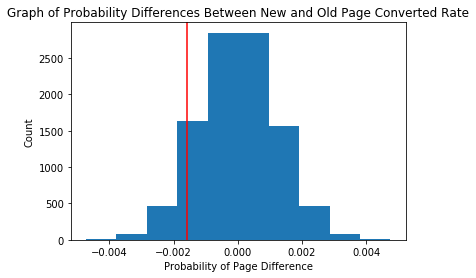

In [29]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red')
plt.title('Graph of Probability Differences Between New and Old Page Converted Rate')
plt.xlabel('Probability of Page Difference') 
plt.ylabel('Count');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
obs_diff = p_treatment_converted - p_control_converted
obs_diff

-0.0015782389853555567

#The actual difference of conversion rate in df2 dataset is -0.0015.

In [30]:
(p_diffs > obs_diff).mean()

0.90890000000000004

The proprtion of p_diffs are greater than the actual difference observed in the df2 data is 0.90.

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? 

>**This is call P-Value.<br>When P-Value <= type I error rate (0.05), null hypothesis is rejected; when P-Value > type I error rate (0.05), it fail to reject the null hypothesis.<br>In this case, P-Value is 0.9, which is greater than type I error rate (0.05), therefore, the old page is better than the new page.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('converted == 1 and landing_page == "old_page"'))

# number of conversions with the new_page
convert_new = len(df2.query('converted == 1 and landing_page == "new_page"'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


z score is 1.3116 and p value is 0.9051.

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>**A z-score measures the distance between a data point and the mean using standard deviations.<br>
In our research above, p-value is 0.0905, means there are 9% probability to get the observe difference given that the null is true. As a result, we fail to reject null hypothesis.<br>Therefore the conclusion is same as part j that we accept null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic Regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
#Set a dummy column called "ab_page" to identify group data.
df2['intercept']= 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
#Fit model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-24 07:27 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

>**The p-value is 0.1897, Type I error threshold is 0.05, hence the null cannot be rejected. <br> 
This conclusion is the same as PartII: the old page should be continue using since the new page did not prove to have a better conversion.<br> However, the p-value in Part III is differs from the value in Part II due to different hypotheses being tested.<br>
In this case, we are doing a two-tailed test, so we are testing both side of the statistic distribution. The alternative is that the new page has a different conversion rate than the old page. Thus, if the new page performs worse than the old page, it would still fit the alternative hypothesis and this is why the p-value decreased. On the other hand, previously we are doing a one-tailed test, in which the alternative was that the new page has higher conversions.**


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**In reality, many factors might influence the user's conversion. For example, when customers suffer on change aversion or some customers has specific presference on the usage page of the website. Hence, it is always a good idea to consider other factors adding to the regression model. Although adding more terms will always improve the model, adding more independent variables can potentially lead to overfitting. For instance, the estimation can suffer from multicollinearity, which occurs when we have highly correlated predictors. Also, another potential issues to consider are Simpson's paradox or confounding variables.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [36]:
# Read the file countries.csv
countries = pd.read_csv('countries.csv')

In [37]:
# Join with the df2 dataframe
new_df = pd.merge(countries, df2, how='inner', on = ['user_id','user_id'])
new_df.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [38]:
new_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [39]:
# Create the necessary dummy variables
new_df[['UK', 'US']] = pd.get_dummies(new_df['country'])[['UK', 'US']]

In [40]:
# Combine 2 columns to create an interaction column between page and country. 
new_df['ab_page_US'] = new_df['ab_page'] * new_df['US']
new_df['ab_page_UK'] = new_df['ab_page'] * new_df['UK']
new_df.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,ab_page_US,ab_page_UK
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [41]:
# Fit your model, and summarize the results
final_model = sm.Logit(new_df['converted'], new_df[['intercept','ab_page','US','UK','ab_page_US','ab_page_UK']])
results = final_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-24 07:27 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**Conclusion**

>**In the summary, P-values are all greater than type I error rate (0.05), therefore, it fail to reject the null hypothesis.**

>**To conclude, there is no sufficient evidence to suggest whether a user will coverts or not and whether there is an interaction between country and page usage.**

>**Based on the information given, we do not have sufficient evidence to suggest that the new page results in more conversions than the old page.**

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0